This program is based on the 12 islander problem introduced in Broklynn 99

The problem is:
- There are 12 islanders who all weigh the same weight
- You just learned that one of them is either heavier or lighter than the rest
- There is a seesaw that you can use but only 3 times
- How will you determien who the different islander is?

Goal:
1. Determine who the different islanders is
2. Determine how to determine this


In [4]:
import random

In [5]:
succesful = []
failures = []
num = 100

In [11]:
while(len(succesful) < num):
    ## PROBLEM SETUP
    islanders = [1] * 12
    rand_index = random.randint(0, 11)  # randomly select an index between 0 and 11
    rand_value = random.choice([0, 2])  # randomly select a value of -1 or 1 (over or underweight)
    islanders[rand_index] = rand_value  # assign the random value to the random index


    current_path = []
    for attempt in range(0,3):
        num_left = len(islanders)
        if num_left > 1:
            on_seesaw_left = random.randint(0, num_left-1)
            on_seesaw_right = random.randint(on_seesaw_left+1, num_left)
        
            sum_left = sum(islanders[:on_seesaw_left])
            sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])

            current_path.append([on_seesaw_left+1,on_seesaw_right-on_seesaw_left])
        
            if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                islanders = islanders[on_seesaw_right:]
            else: #someone in here is different
                islanders = islanders[:on_seesaw_right]

    if len(islanders) == 1:
        succesful.append(current_path)
    else:
        failures.append(current_path)

Now let's attempt it for all possible permutations of the problem!
There are 104,850 different ways to arrange the seesaw for all 3 attempts. Let's just run it a few and see some proprtions

In [12]:
print(succesful)
print(len(failures))

[[[8, 2], [4, 3], [2, 1]], [[4, 6], [1, 1], [1, 1]], [[4, 2], [3, 2], [1, 1]], [[1, 8], [2, 2], [1, 1]], [[2, 1], [1, 1], [1, 1]], [[3, 1], [2, 2], [1, 1]], [[7, 5], [1, 1], [1, 1]], [[2, 2], [1, 1], [1, 1]], [[1, 12], [9, 2], [1, 1]], [[4, 9], [1, 4], [2, 2]], [[5, 1], [1, 1], [1, 1]], [[2, 4], [1, 2], [1, 1]], [[5, 2], [3, 1], [1, 1]], [[8, 2], [8, 2], [5, 4]], [[5, 1], [3, 2], [1, 1]], [[5, 2], [3, 2], [1, 1]], [[6, 6], [1, 1], [1, 1]], [[6, 6], [1, 1], [1, 1]], [[1, 1], [1, 1], [1, 1]], [[5, 5], [2, 1], [1, 1]], [[5, 1], [2, 2], [2, 1]], [[2, 3], [3, 1], [1, 1]], [[2, 2], [1, 3], [1, 1]], [[4, 2], [1, 1]], [[11, 1], [6, 4], [1, 1]], [[6, 5], [1, 2], [1, 1]], [[1, 2], [1, 1]], [[7, 4], [3, 1], [1, 1]], [[2, 1], [2, 1], [1, 1]], [[1, 9], [5, 2], [3, 3]], [[5, 5], [2, 1]], [[11, 1], [1, 1]], [[5, 2], [1, 3], [1, 1]], [[7, 5]], [[6, 6]], [[5, 2], [4, 2], [3, 2]], [[1, 4], [4, 1], [1, 1]], [[1, 7], [5, 2], [1, 1]], [[1, 11], [1, 1]], [[6, 4], [1, 3], [2, 1]], [[1, 1]], [[7, 4], [6, 1], 

## Data Visualization

In [13]:
import matplotlib.pyplot as plt

In [14]:
counts = {}
for sublist in succesful:
    first_idx = frozenset(sublist[0])
    counts[first_idx] = counts.get(first_idx,0)+1

In [15]:
# Get rid of any that have a less than 1 % success rate
rate = 0.015
filter = rate * num
print(filter)
counts = {k: v for k, v in counts.items() if v >= int(filter)}

1.5


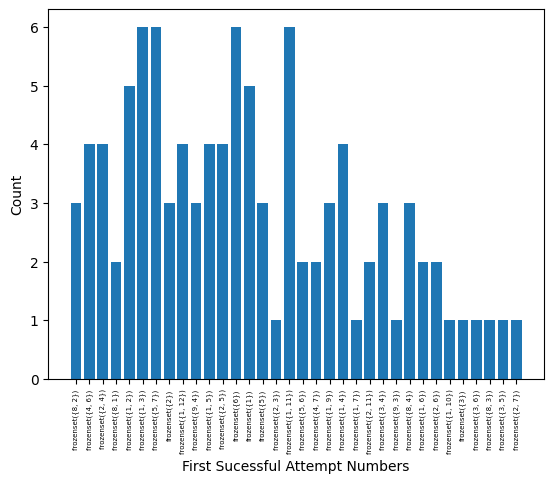

In [16]:
plt.bar(range(len(counts)),list(counts.values()),align = 'center')
plt.xticks(range(len(counts)),list(counts.keys()),rotation='vertical',fontsize=5)
plt.xlabel("First Sucessful Attempt Numbers")
plt.ylabel("Count")
plt.show()

Now display the successful second attemps based on these successful first attempts

In [17]:
second_counts = {}
for sublist in succesful:
    first_idx = frozenset(sublist[0])
    if first_idx in counts:
        second_idx = frozenset(sublist[1])
        second_counts[second_idx] = second_counts.get(second_idx,0)+1

IndexError: list index out of range

In [18]:
# Get rid of any that have a less than 1 % success rate
rate = 0.015
filter = 1500#rate * len(second_counts)
print(filter)
second_counts = {k: v for k, v in second_counts.items() if v >= int(filter)}

1500


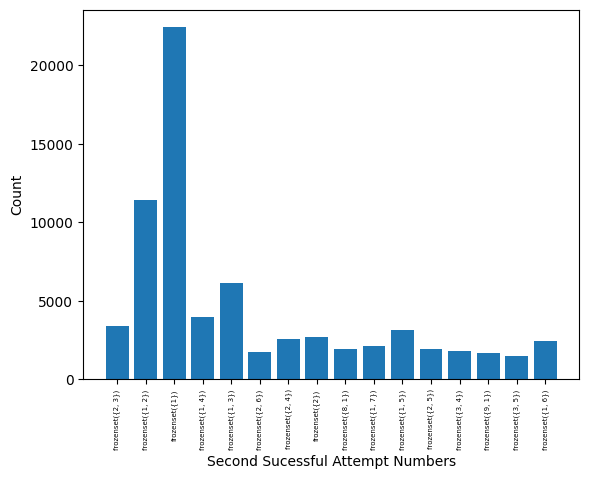

In [59]:
plt.bar(range(len(second_counts)),list(second_counts.values()),align = 'center')
plt.xticks(range(len(second_counts)),list(second_counts.keys()),rotation='vertical',fontsize=5)
plt.xlabel("Second Sucessful Attempt Numbers")
plt.ylabel("Count")
plt.show()

Now for the final attempt

In [60]:
third_counts = {}
for sublist in succesful:
    second_idx = frozenset(sublist[1])
    if second_idx in second_counts:
        third_idx = frozenset(sublist[2])
        third_counts[third_idx] = third_counts.get(third_idx,0)+1

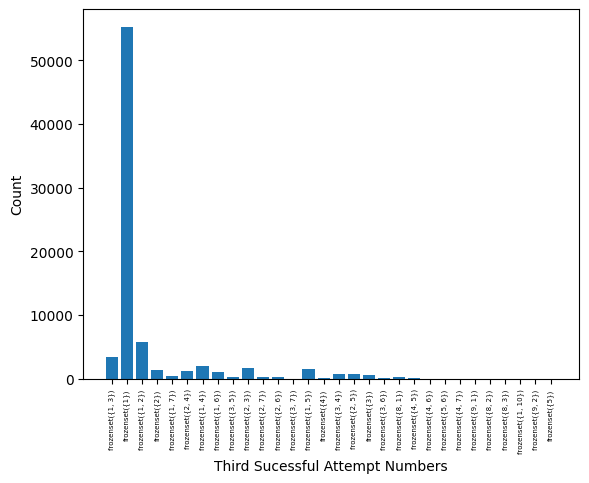

In [61]:
plt.bar(range(len(third_counts)),list(third_counts.values()),align = 'center')
plt.xticks(range(len(third_counts)),list(third_counts.keys()),rotation='vertical',fontsize=5)
plt.xlabel("Third Sucessful Attempt Numbers")
plt.ylabel("Count")
plt.show()

## Takeaways
All that really showed me was that if you get to 1 on the second attempt it's really easy! I need to find a new way to approach it so that every time we can figure it out with 100% confidence.

What I'm thinking:
- For every succesfull solution, I make it solve it again with the same numbers. If it can solve it TWICE, then I can take it into consideration and do it be hand. If not, I'll need to reject it and keep looking

In [74]:
succesful = []
failures = []
num = 10

In [75]:
was_just_successful = False
while(len(succesful) < num):
    ## PROBLEM SETUP
    islanders = [0] * 12
    rand_index = random.randint(0, 11)  # randomly select an index between 0 and 11
    rand_value = random.choice([-1, 1])  # randomly select a value of -1 or 1 (over or underweight)
    islanders[rand_index] = rand_value  # assign the random value to the random index
    
    if was_just_successful:
        for attempt in range(0,3):
            num_left = len(islanders)
            on_seesaw_left = current_path[0][0]-1 # subtract one for the indexs
            on_seesaw_right = current_path[0][1]-1
        
            sum_left = sum(islanders[:on_seesaw_left])
            sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])
        
            if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                islanders = islanders[on_seesaw_right:]
            else: #someone in here is different
                islanders = islanders[:on_seesaw_right]
    
        if len(islanders) == 1:
            succesful.append(current_path)
        
        # for now, only attempt again once
        was_just_successful = False
        current_path = []
    
    else:
        current_path = []
        for attempt in range(0,3):
            num_left = len(islanders)
            on_seesaw_left = random.randint(0, num_left-1)
            on_seesaw_right = random.randint(on_seesaw_left+1, num_left)
        
            sum_left = sum(islanders[:on_seesaw_left])
            sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])

            current_path.append([on_seesaw_left+1,on_seesaw_right-on_seesaw_left])
        
            if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                islanders = islanders[on_seesaw_right:]
            else: #someone in here is different
                islanders = islanders[:on_seesaw_right]
        if len(islanders) == 1:
            was_just_successful = True

In [76]:
print(succesful)

[[[7, 2], [3, 5], [1, 1]], [[9, 2], [1, 1], [1, 1]], [[11, 2], [8, 4], [1, 1]], [[7, 2], [7, 1], [1, 1]], [[2, 2], [1, 1], [1, 1]], [[11, 2], [8, 4], [1, 1]], [[1, 2], [1, 1], [1, 1]], [[9, 2], [2, 1], [1, 1]], [[8, 2], [5, 2], [3, 3]], [[10, 2], [3, 6], [1, 1]]]


Okay now we have 10 options for options that can be successful twice! But this doesn't gaurntee 100% accuracy like a logic puzzle should!

## Final Ideas
What my final idea is:
- If I find something that is successful, loop through and put the different islander in every position
- Keep going through until it breaks

In [42]:
succesful = []
num = 2

In [43]:
was_just_successful = False
while(len(succesful) < num):
    ## PROBLEM SETUP

    while was_just_successful:
        for idx in range (0,len(islanders)):
            islanders = [1] * 12
            rand_value = random.choice([-1, 1])  # randomly select a value of -1 or 1 (over or underweight)
            islanders[idx] = rand_value  # assign the random value to the random index

            for attempt in range(0,3):
                on_seesaw_left = current_path[attempt][0]-1 # subtract one for the indexs
                on_seesaw_right = current_path[attempt][1]-1
            
                sum_left = sum(islanders[:on_seesaw_left])
                sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])
            
                if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                    islanders = islanders[on_seesaw_right:]
                else: #someone in here is different
                    islanders = islanders[:on_seesaw_right]
        
            if len(islanders) == 1:
                succesful.append(current_path)
            else:
                was_just_successful = False

            if idx == 11 and len(islanders) == 1: #we've reached the end adn it was good for all!  
                succesful.append(current_path) 
    else:
        islanders = [0] * 12
        rand_index = random.randint(0, 11)  # randomly select an index between 0 and 11
        rand_value = random.choice([-1, 1])  # randomly select a value of -1 or 1 (over or underweight)
        islanders[rand_index] = rand_value  # assign the random value to the random index
        current_path = []
        for attempt in range(0,3):
            num_left = len(islanders)
            on_seesaw_left = random.randint(0, num_left-1)
            on_seesaw_right = random.randint(on_seesaw_left+1, num_left)
        
            sum_left = sum(islanders[:on_seesaw_left])
            sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])

            current_path.append([on_seesaw_left+1,on_seesaw_right-on_seesaw_left])
        
            if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                islanders = islanders[on_seesaw_right:]
            else: #someone in here is different
                islanders = islanders[:on_seesaw_right]
        if len(islanders) == 1:
            was_just_successful = True

KeyboardInterrupt: 

In [44]:
print("Attempting path: "+str(current_path))

Attempting path: [[5, 2], [5, 2], [1, 5]]


In [20]:
print(succesful)

[[[8, 2], [4, 3], [2, 1]], [[4, 6], [1, 1], [1, 1]], [[4, 2], [3, 2], [1, 1]], [[1, 8], [2, 2], [1, 1]], [[2, 1], [1, 1], [1, 1]], [[3, 1], [2, 2], [1, 1]], [[7, 5], [1, 1], [1, 1]], [[2, 2], [1, 1], [1, 1]], [[1, 12], [9, 2], [1, 1]], [[4, 9], [1, 4], [2, 2]], [[5, 1], [1, 1], [1, 1]], [[2, 4], [1, 2], [1, 1]], [[5, 2], [3, 1], [1, 1]], [[8, 2], [8, 2], [5, 4]], [[5, 1], [3, 2], [1, 1]], [[5, 2], [3, 2], [1, 1]], [[6, 6], [1, 1], [1, 1]], [[6, 6], [1, 1], [1, 1]], [[1, 1], [1, 1], [1, 1]], [[5, 5], [2, 1], [1, 1]], [[5, 1], [2, 2], [2, 1]], [[2, 3], [3, 1], [1, 1]], [[2, 2], [1, 3], [1, 1]], [[4, 2], [1, 1]], [[11, 1], [6, 4], [1, 1]], [[6, 5], [1, 2], [1, 1]], [[1, 2], [1, 1]], [[7, 4], [3, 1], [1, 1]], [[2, 1], [2, 1], [1, 1]], [[1, 9], [5, 2], [3, 3]], [[5, 5], [2, 1]], [[11, 1], [1, 1]], [[5, 2], [1, 3], [1, 1]], [[7, 5]], [[6, 6]], [[5, 2], [4, 2], [3, 2]], [[1, 4], [4, 1], [1, 1]], [[1, 7], [5, 2], [1, 1]], [[1, 11], [1, 1]], [[6, 4], [1, 3], [2, 1]], [[1, 1]], [[7, 4], [6, 1], 

# Redo Data Analysis!
We know everything above works for all numbers!

In [21]:
counts = {}
for sublist in succesful:
    first_idx = frozenset(sublist[0])
    counts[first_idx] = counts.get(first_idx,0)+1

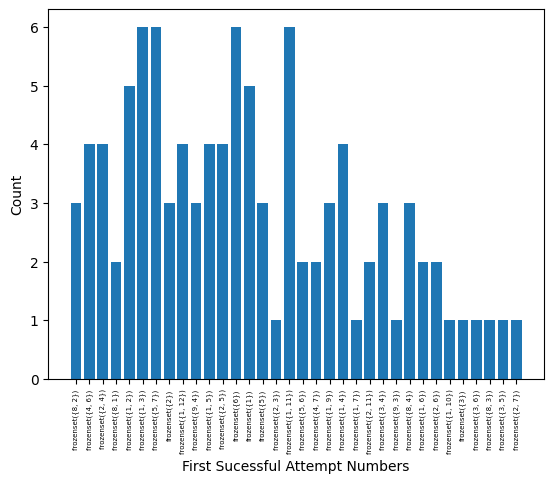

In [22]:
plt.bar(range(len(counts)),list(counts.values()),align = 'center')
plt.xticks(range(len(counts)),list(counts.keys()),rotation='vertical',fontsize=5)
plt.xlabel("First Sucessful Attempt Numbers")
plt.ylabel("Count")
plt.show()

In [23]:
counts = {}
for sublist in succesful:
    first_idx = frozenset(sublist[1])
    counts[first_idx] = counts.get(first_idx,0)+1

IndexError: list index out of range

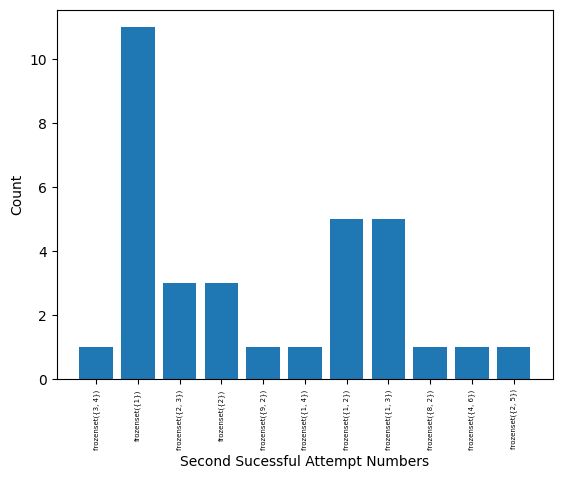

In [24]:
plt.bar(range(len(counts)),list(counts.values()),align = 'center')
plt.xticks(range(len(counts)),list(counts.keys()),rotation='vertical',fontsize=5)
plt.xlabel("Second Sucessful Attempt Numbers")
plt.ylabel("Count")
plt.show()

# A Few Main Strategies
All the above lists in 'successful' all work for any index of where the random person is. Let's work on figuring out how to narrate the strategy

In [129]:
print(succesful)

[[[4, 3], [3, 2], [1, 1]], [[4, 3], [3, 2], [1, 1]], [[4, 3], [3, 2], [1, 1]], [[4, 3], [3, 2], [1, 1]], [[2, 1], [5, 2], [1, 1]], [[2, 1], [5, 2], [1, 1]], [[2, 1], [5, 2], [1, 1]], [[8, 3], [2, 1], [6, 2]], [[8, 3], [2, 1], [6, 2]], [[8, 3], [2, 1], [6, 2]], [[8, 3], [2, 1], [6, 2]], [[8, 3], [2, 1], [6, 2]], [[8, 3], [2, 1], [6, 2]]]


In [25]:
from collections import Counter

In [26]:
tuples = [tuple(x) for x in succesful]

In [29]:
print(succesful)

[[[8, 2], [4, 3], [2, 1]], [[4, 6], [1, 1], [1, 1]], [[4, 2], [3, 2], [1, 1]], [[1, 8], [2, 2], [1, 1]], [[2, 1], [1, 1], [1, 1]], [[3, 1], [2, 2], [1, 1]], [[7, 5], [1, 1], [1, 1]], [[2, 2], [1, 1], [1, 1]], [[1, 12], [9, 2], [1, 1]], [[4, 9], [1, 4], [2, 2]], [[5, 1], [1, 1], [1, 1]], [[2, 4], [1, 2], [1, 1]], [[5, 2], [3, 1], [1, 1]], [[8, 2], [8, 2], [5, 4]], [[5, 1], [3, 2], [1, 1]], [[5, 2], [3, 2], [1, 1]], [[6, 6], [1, 1], [1, 1]], [[6, 6], [1, 1], [1, 1]], [[1, 1], [1, 1], [1, 1]], [[5, 5], [2, 1], [1, 1]], [[5, 1], [2, 2], [2, 1]], [[2, 3], [3, 1], [1, 1]], [[2, 2], [1, 3], [1, 1]], [[4, 2], [1, 1]], [[11, 1], [6, 4], [1, 1]], [[6, 5], [1, 2], [1, 1]], [[1, 2], [1, 1]], [[7, 4], [3, 1], [1, 1]], [[2, 1], [2, 1], [1, 1]], [[1, 9], [5, 2], [3, 3]], [[5, 5], [2, 1]], [[11, 1], [1, 1]], [[5, 2], [1, 3], [1, 1]], [[7, 5]], [[6, 6]], [[5, 2], [4, 2], [3, 2]], [[1, 4], [4, 1], [1, 1]], [[1, 7], [5, 2], [1, 1]], [[1, 11], [1, 1]], [[6, 4], [1, 3], [2, 1]], [[1, 1]], [[7, 4], [6, 1], 

In [39]:
counts = {}
for sublist in succesful:
    print(sublist)
    first_idx = tuple([sublist[0][0],sublist[0][1],sublist[1][0],sublist[1][1],sublist[2][0],sublist[2][1]])
    counts[first_idx] = counts.get(first_idx,0)+1

[[8, 2], [4, 3], [2, 1]]
[[4, 6], [1, 1], [1, 1]]
[[4, 2], [3, 2], [1, 1]]
[[1, 8], [2, 2], [1, 1]]
[[2, 1], [1, 1], [1, 1]]
[[3, 1], [2, 2], [1, 1]]
[[7, 5], [1, 1], [1, 1]]
[[2, 2], [1, 1], [1, 1]]
[[1, 12], [9, 2], [1, 1]]
[[4, 9], [1, 4], [2, 2]]
[[5, 1], [1, 1], [1, 1]]
[[2, 4], [1, 2], [1, 1]]
[[5, 2], [3, 1], [1, 1]]
[[8, 2], [8, 2], [5, 4]]
[[5, 1], [3, 2], [1, 1]]
[[5, 2], [3, 2], [1, 1]]
[[6, 6], [1, 1], [1, 1]]
[[6, 6], [1, 1], [1, 1]]
[[1, 1], [1, 1], [1, 1]]
[[5, 5], [2, 1], [1, 1]]
[[5, 1], [2, 2], [2, 1]]
[[2, 3], [3, 1], [1, 1]]
[[2, 2], [1, 3], [1, 1]]
[[4, 2], [1, 1]]


IndexError: list index out of range

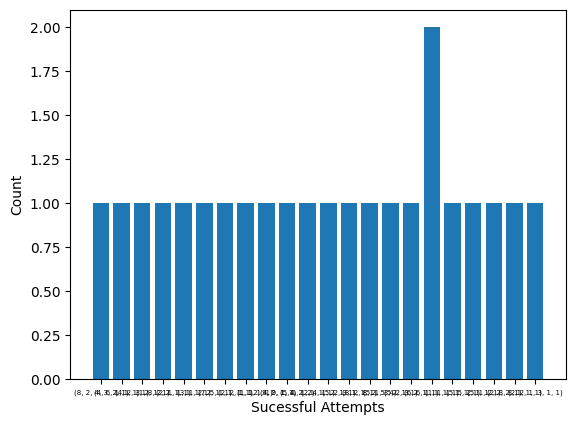

In [28]:
plt.bar(range(len(counts)),list(counts.values()),align = 'center')
plt.xticks(range(len(counts)),list(counts.keys()),rotation='horizontal',fontsize=5)
plt.xlabel("Sucessful Attempts")
plt.ylabel("Count")
plt.show()

### I would like to craete a descion tree to show the optiosn!
Here are some notes on the above attempts:
- [6,2],[3,1],[1,1]
- [7,2],[1,1],[1,1]
- [10,2],[1,1],[1,1]
- [6,2],[5,1],[1,1]

These all wish on the luck that the random person gets called out very quickly and can't be gauranteed to be right

In [ ]:
# [6,2],[3,1],[1,1]


# Ideas are wrong! Above wouldn't work, let's try again

In [45]:
import random

succesful = []
num = 3

was_just_successful = False
while(len(succesful) < num):
    ## PROBLEM SETUP

    while was_just_successful:
        print("Attempting path: "+str(current_path))
        for idx in range (0,len(islanders)):
            print("at index "+ str(idx))
            islanders = [1] * 12
            rand_value = random.choice([0.5, 1.5])  # randomly select a value of -1 or 1 (over or underweight)
            islanders[idx] = rand_value  # assign the random value to the random index

            for attempt in range(0,3):
                on_seesaw_left = current_path[attempt][0]-1 # subtract one for the indexs
                on_seesaw_right = current_path[attempt][1]-1
            
                sum_left = sum(islanders[:on_seesaw_left])
                sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])
            
                if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                    islanders = islanders[on_seesaw_right:]
                else: #someone in here is different
                    islanders = islanders[:on_seesaw_right]
        
            if len(islanders) == 1:
                succesful.append(current_path)
            else:
                was_just_successful = False
                print("Failed at index: "+str(idx))

            if idx == 11 and len(islanders) == 1: #we've reached the end and it was good for all!  
                succesful.append(current_path) 
    else:
        islanders = [1] * 12
        rand_index = random.randint(0, 11)  # randomly select an index between 0 and 11
        rand_value = random.choice([0.5, 1.5])  # randomly select a value of -1 or 1 (over or underweight)
        islanders[rand_index] = rand_value  # assign the random value to the random index
        current_path = []
        for attempt in range(0,3):
            num_left = len(islanders)
            on_seesaw_left = random.randint(0, num_left-1)
            on_seesaw_right = random.randint(on_seesaw_left+1, num_left)
        
            sum_left = sum(islanders[:on_seesaw_left])
            print("sum left: "+str(sum_left))

            sum_right = sum(islanders[on_seesaw_left:on_seesaw_right])
            print("sum right: "+str(sum_left))

            current_path.append([on_seesaw_left+1,on_seesaw_right-on_seesaw_left])
        
            if(sum_left == sum_right):#if they are the same, none of the islanders on the seesaw are different
                islanders = islanders[on_seesaw_right:]
            else: #someone in here is different
                islanders = islanders[:on_seesaw_right]
        if len(islanders) == 1:
            was_just_successful = True

print(succesful)

Attempting path: [[12, 1], [1, 1], [1, 1]]
at index 0
Failed at index: 0
Attempting path: [[1, 3], [2, 1], [1, 1]]
at index 0
Failed at index: 0


ValueError: empty range for randrange() (0, 0, 0)